In [146]:
#Importo las librerias de python que necesito
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import time

#Importo sklearn para KNN, PCA y las metricas
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score


In [147]:
#Leo mi dataset
df_train = pd.read_csv("data/fashion-mnist_train.csv")
df_test = pd.read_csv("data/fashion-mnist_test.csv")

print("Dimensiones de base train: ", df_train.shape)
print("Dimensiones de base testn: ", df_test.shape)

Dimensiones de base train:  (60000, 785)
Dimensiones de base testn:  (10000, 785)


In [148]:
clothes = [[0,'T-shirt/top'], [1,'Trouser'], [2,'Pullover'], [3, 'Dress'], 
           [4, 'Coat'], [5, 'Sandal'], [6, 'Shirt'], [7, 'Sneaker'], [8, 'Bag'], [9, 'Ankle boot']]

print("Numeros de cada prenda de ropa")
clothes

Numeros de cada prenda de ropa


[[0, 'T-shirt/top'],
 [1, 'Trouser'],
 [2, 'Pullover'],
 [3, 'Dress'],
 [4, 'Coat'],
 [5, 'Sandal'],
 [6, 'Shirt'],
 [7, 'Sneaker'],
 [8, 'Bag'],
 [9, 'Ankle boot']]

## Exploracion del dataset

In [149]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
#Total de datos que quiero tomar de cada base
#MAX:60000
total_train = 60000
#MAX:10000
total_test = 10000 

In [151]:
#Separo en labels y datos

#Hacer base mas chiquita para probar
df_train = df_train[0:total_train]
df_test = df_test[0:total_test]

train_data = df_train[df_train.columns[1:]].values
train_labels = df_train["label"].values.reshape(-1, 1)

print("Tamaño Train Data:", train_data.shape)
print("Tamaño Train Labels:", train_labels.shape)

Tamaño Train Data: (60000, 784)
Tamaño Train Labels: (60000, 1)


In [152]:
#Separo en labels y datos

test_data = df_test[df_train.columns[1:]].values
test_labels = df_test["label"].values.reshape(-1, 1)

print("Tamaño Test Data:", test_data.shape)
print("Tamaño Test Labels:", test_labels.shape)

Tamaño Test Data: (10000, 784)
Tamaño Test Labels: (10000, 1)


Veo como es un dato aleatorio en 'formato imagen'
Dato numero:  26597
La imagen es:  Bag


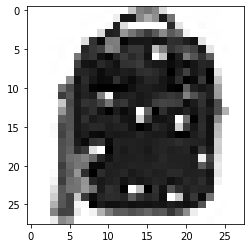

In [153]:
print("Veo como es un dato aleatorio en 'formato imagen'")

num = random.randint(0, total_train - 1)

print("Dato numero: ", num)

image = train_data[num].reshape(28,28)

plt.imshow(image, cmap="Greys")

print("La imagen es: ", clothes[train_labels[num][0]][1])

### Balance de la base

In [154]:
print("Labels de cada dato")
df_train["label"]

Labels de cada dato


0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [155]:
print("Porcentajes de cada tipo de prenda en la base")
df_train["label"].value_counts(normalize = True)

Porcentajes de cada tipo de prenda en la base


0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
Name: label, dtype: float64

## KNN sin PCA

In [156]:
numero_ejecuciones = 10

In [157]:
#Mis datos de train son train_data y train_labels y mis datos de test son test_data y test_labels

#Elijo el n para KNN
n = 10
knn = KNeighborsClassifier(n)
times = np.array([])

for i in range(numero_ejecuciones):
    print("Ejecucion", i+1)
    #empiezo a contar el tiempo
    start = time.perf_counter()

    #knn
    knn.fit(train_data, train_labels.flatten())
    res_knn = knn.predict(test_data)

    #termino de contar el tiempo
    end = time.perf_counter()
    print(end-start)
    print("Tiempo: ", end - start, "\n")
    times = np.append(times, [end-start])

print("Media de tiempo de ejecucion knn: ", np.mean(times), "segundos")

print("Tiempo total:", np.sum(times), "segundos")


Ejecucion 1
13.860377409000648
Tiempo:  13.860377409000648 

Ejecucion 2
13.458065648001138
Tiempo:  13.458065648001138 

Ejecucion 3
13.6219268320001
Tiempo:  13.6219268320001 

Ejecucion 4
13.462477201999718
Tiempo:  13.462477201999718 

Ejecucion 5
13.605903680001575
Tiempo:  13.605903680001575 

Ejecucion 6
13.546403857000769
Tiempo:  13.546403857000769 

Ejecucion 7
13.823168524999346
Tiempo:  13.823168524999346 

Ejecucion 8
13.678674456999943
Tiempo:  13.678674456999943 

Ejecucion 9
13.876259861001017
Tiempo:  13.876259861001017 

Ejecucion 10
13.545996990000276
Tiempo:  13.545996990000276 

Media de tiempo de ejecucion knn:  13.647925446100453 segundos
Tiempo total: 136.47925446100453 segundos


### Metricas

In [158]:
print("Con", train_data.shape[0] ,"datos de train y", test_data.shape[0] ,"datos de test ")

Con 60000 datos de train y 10000 datos de test 


In [159]:
print("Accuracy:", accuracy_score(res_knn, test_labels))

Accuracy: 0.8573


In [160]:
print("Cohen Kappa:", cohen_kappa_score(res_knn, test_labels))
print("Recall:", recall_score(res_knn, test_labels, average ='micro'))
print("F1:", f1_score(res_knn, test_labels, average ='micro'))

Cohen Kappa: 0.8414444444444444
Recall: 0.8573
F1: 0.8573


### Comparacion de las predicciones con los valores reales de los datos de test

Text(0.5, 1.0, 'Valores Reales: Cantidad de Imagenes por Tipo de Prenda')

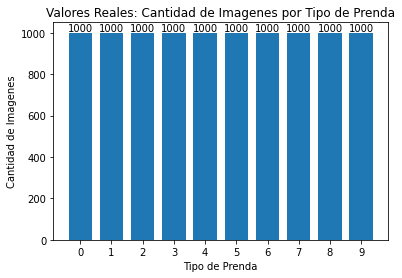

In [161]:
count_original = np.bincount(test_labels.flatten())
a = np.arange(10)

fig, ax = plt.subplots()
p1 = ax.bar(a, count_original, 0.75)
ax.set_xticks(a)
ax.bar_label(p1)

plt.xlabel("Tipo de Prenda")
plt.ylabel("Cantidad de Imagenes")
plt.title("Valores Reales: Cantidad de Imagenes por Tipo de Prenda")

Text(0.5, 1.0, 'Prediccion: Cantidad de Imagenes por Tipo de Prenda')

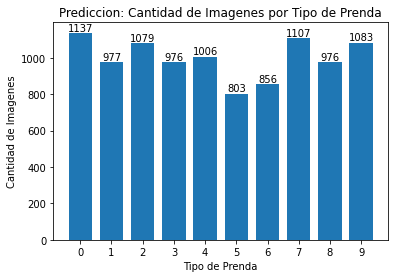

In [162]:
count_res = np.bincount(res_knn.flatten())
a = np.arange(10)

fig, ax = plt.subplots()
p2 = ax.bar(a, count_res, 0.75)
ax.set_xticks(a)
ax.bar_label(p2)

plt.xlabel("Tipo de Prenda")
plt.ylabel("Cantidad de Imagenes")
plt.title("Prediccion: Cantidad de Imagenes por Tipo de Prenda")

## KNN Con PCA

In [163]:
pca = PCA(15)
knn = KNeighborsClassifier(10)

#cuento el tiempo que tardo en hacer pca
start = time.perf_counter()

#aplico pca a los datos
pca.fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)

end = time.perf_counter()
pca_time = end - start 

times = np.array([])

for i in range(numero_ejecuciones):
    print("Ejecucion", i+1)
    start = time.perf_counter()
    #hago knn
    knn.fit(train_pca, train_labels.flatten())
    res_pca = knn.predict(test_pca)

    #Termino de contar el tiempo
    end = time.perf_counter()
    print("Tiempo: ", end - start, "\n")
    times = np.append(times, [end-start])

print("Media de tiempo de ejecucion knn: ", np.mean(times), "segundos")
print("Tiempo total:", np.sum(times) + pca_time, "segundos")

Ejecucion 1
Tiempo:  1.5075269549997756 

Ejecucion 2
Tiempo:  1.5081132699997397 

Ejecucion 3
Tiempo:  1.5196014670000295 

Ejecucion 4
Tiempo:  1.4707590449997952 

Ejecucion 5
Tiempo:  1.4686646529989957 

Ejecucion 6
Tiempo:  1.4747467759989377 

Ejecucion 7
Tiempo:  1.501640693999434 

Ejecucion 8
Tiempo:  1.4851196249983332 

Ejecucion 9
Tiempo:  1.4673165600015636 

Ejecucion 10
Tiempo:  1.4631552819992066 

Media de tiempo de ejecucion knn:  1.486664432699581 segundos
Tiempo total: 16.041439539994826 segundos


### Metricas

In [164]:
print("Con", train_data.shape[0] ,"datos de train y", test_data.shape[0] ,"datos de test ")

Con 60000 datos de train y 10000 datos de test 


In [165]:
print("Accuracy:", accuracy_score(res_pca, test_labels))

Accuracy: 0.8382


In [166]:
print("Cohen Kappa:", cohen_kappa_score(res_pca, test_labels))
print("Recall:", recall_score(res_pca, test_labels, average ='micro'))
print("F1:", f1_score(res_pca, test_labels, average ='micro'))

Cohen Kappa: 0.8202222222222222
Recall: 0.8382
F1: 0.8382


Text(0.5, 1.0, 'Prediccion: Cantidad de Imagenes por Tipo de Prenda')

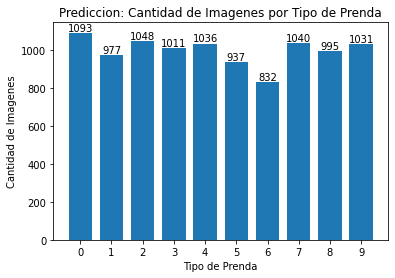

In [167]:
count_res = np.bincount(res_pca.flatten())
a = np.arange(10)

fig, ax = plt.subplots()
p2 = ax.bar(a, count_res, 0.75)
ax.set_xticks(a)
ax.bar_label(p2)

plt.xlabel("Tipo de Prenda")
plt.ylabel("Cantidad de Imagenes")
plt.title("Prediccion: Cantidad de Imagenes por Tipo de Prenda")